In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/UNSW_NB15.csv")

In [3]:
data.head(n=6)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
#Verficar se existem valores nulos nas colunas

data.isnull().any()

id                   False
dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
i

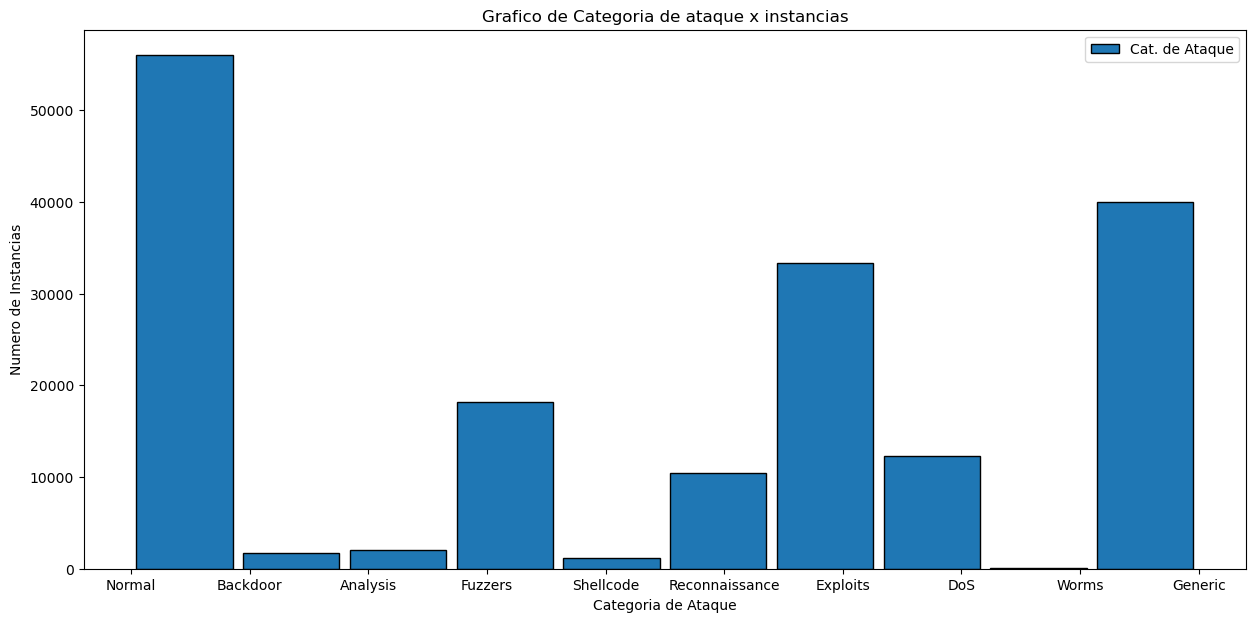

In [5]:
#data.info()
plt.figure(figsize=(15,7))

plt.hist(data.attack_cat, bins=10, edgecolor='black', rwidth=0.9, label='Cat. de Ataque')
plt.xlabel('Categoria de Ataque')
plt.ylabel('Numero de Instancias')
plt.title('Grafico de Categoria de ataque x instancias')
plt.legend(loc='best')

In [6]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [7]:
data['service'].replace('-',np.nan,inplace=True)

#data.isnull().sum()

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(81173, 45)

In [10]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [11]:
features = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/features_UNSW-NB15.csv")

In [12]:
features.head(10)

,﻿No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,"6,state,nominal,""Indicates to the state and it...",NaN,NaN,NaN
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [13]:
features['Type '] = features['Type '].str.lower()

In [14]:
# selecionando nomes de colunas de todos os tipos de dados

nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [15]:
# selecionando nomes de colunas comuns do conjunto de dados e do conjunto de dados de recursos

cols = data.columns

nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [16]:
# Convertendo colunas inteiras em numéricas

for c in integer_names:
  pd.to_numeric(data[c])
     

In [17]:
# Convertendo colunas float em numéricas

for c in float_names:
  pd.to_numeric(data[c])

In [18]:
#data.info()

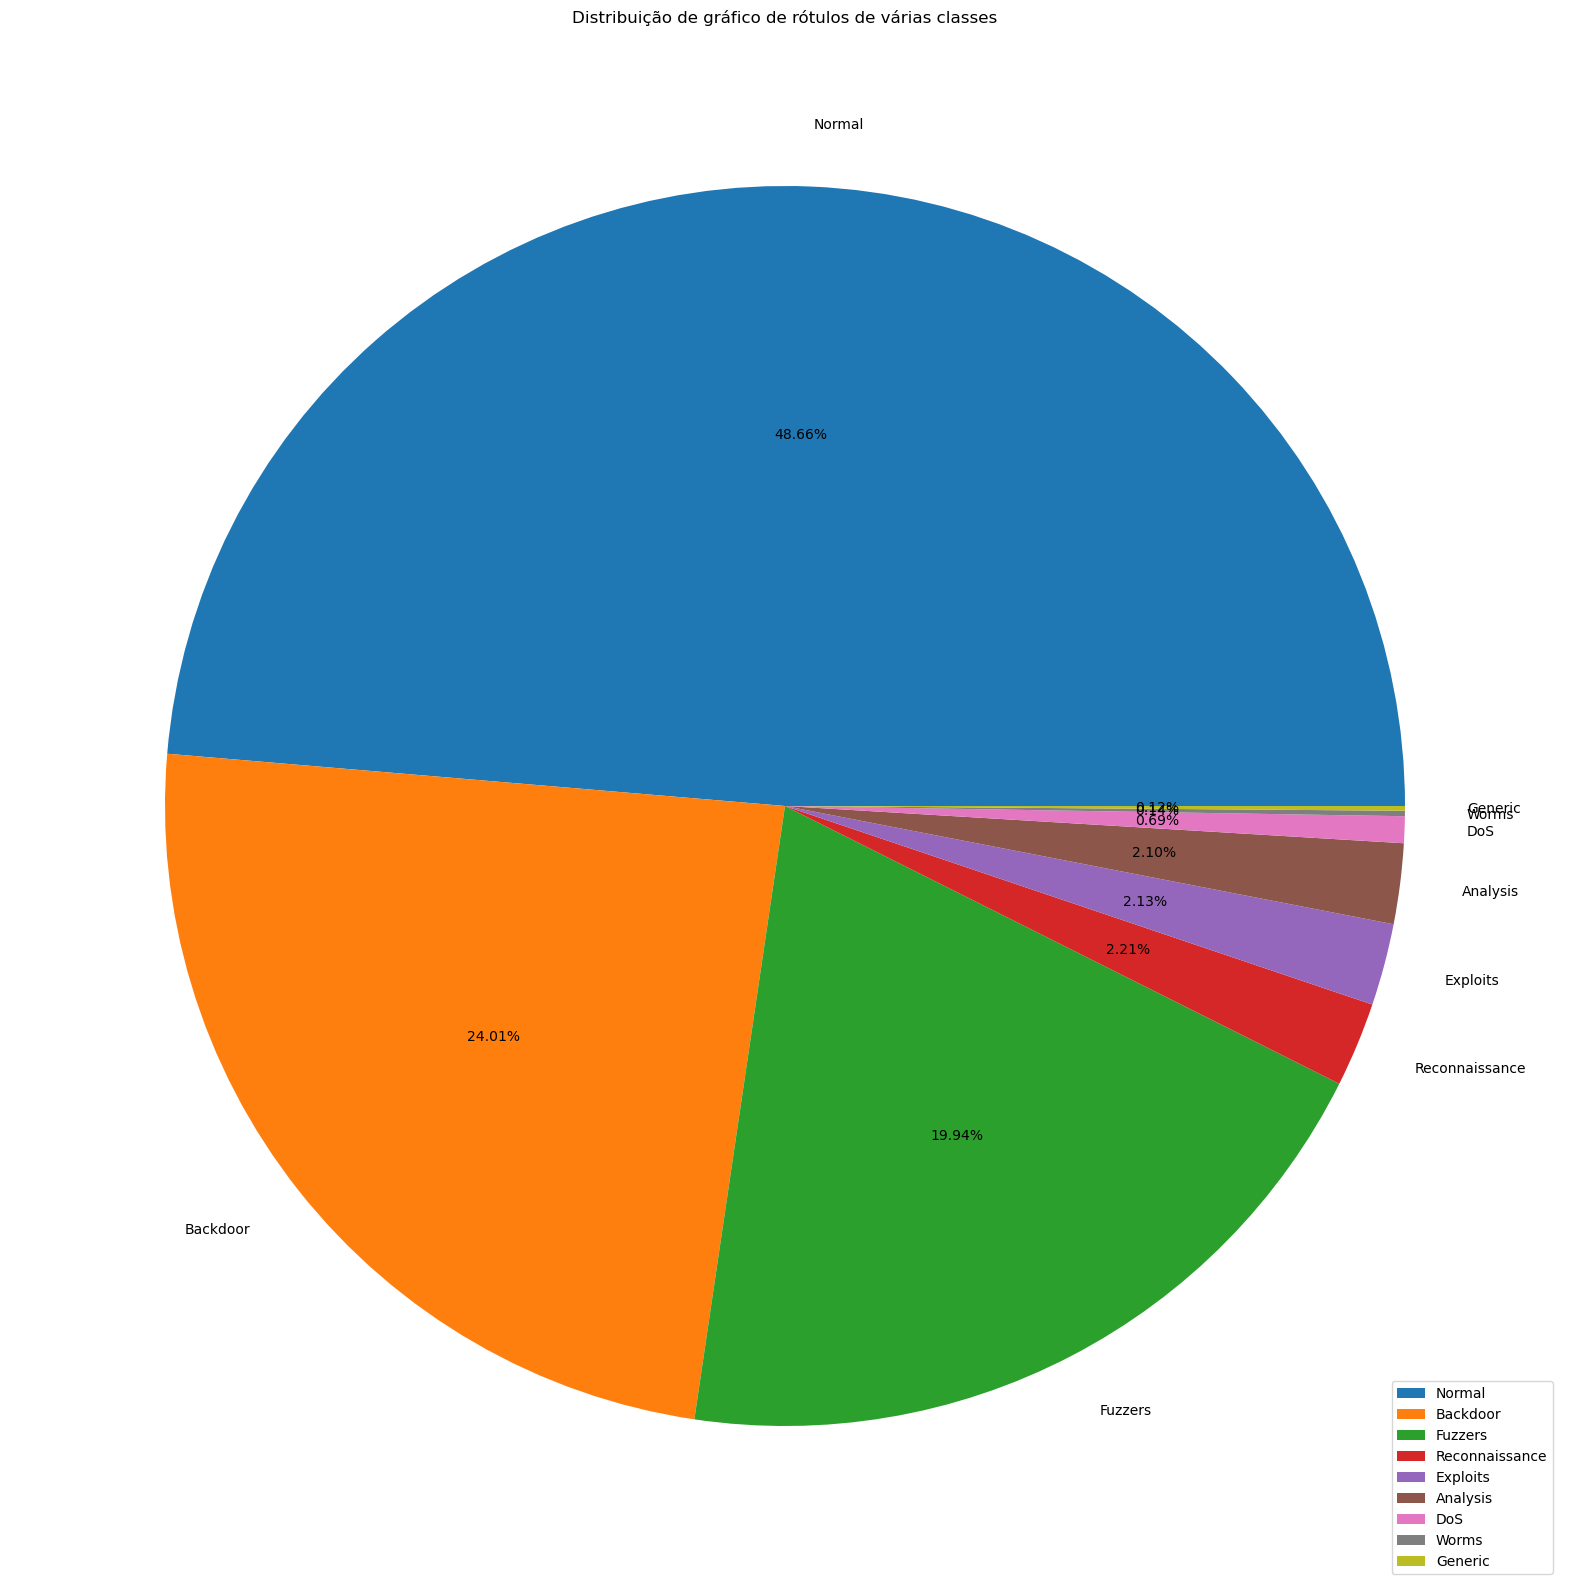

In [19]:
plt.figure(figsize=(20,30))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Distribuição de gráfico de rótulos de várias classes')
plt.legend(loc='best')
#plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [20]:
num_col = data.select_dtypes(include='number').columns

# selecionando atributos de dados categóricos

cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [21]:
# criando um dataframe apenas com atributos categóricos

data_cat = data[cat_col].copy()
data_cat.head(6)

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN
22,tcp,ftp,CON


In [22]:
# transformando dados categoricos em numericos

data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [23]:
data_cat.head(6)

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
22,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
data = pd.concat([data, data_cat],axis=1)

In [25]:
data.shape

(81173, 64)

In [26]:
data.drop(columns=cat_col,inplace=True)

In [27]:
data.shape

(81173, 61)

In [28]:
#Data Normalization

In [29]:
# selecting numeric attributes columns from data

num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')

print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [30]:
# usando minmax scaler para normalizar dados

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [31]:
# dados antes da normalização

data.head(6)

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0
22,23,0.964656,14,12,690,950,25.915974,62,252,5.315885e+03,...,0,0,0,0,0,1,0,0,0,0


In [32]:
#Label Encoding

In [33]:

multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [34]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [35]:
# label encoding (0,1,2,3,4,5,6,7,8) rótulos multiclasse

le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [36]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [37]:
#Correlação entre características do conjunto de dados

In [38]:
num_col.append('label')

In [39]:
num_col = list(multi_data.select_dtypes(include='number').columns)

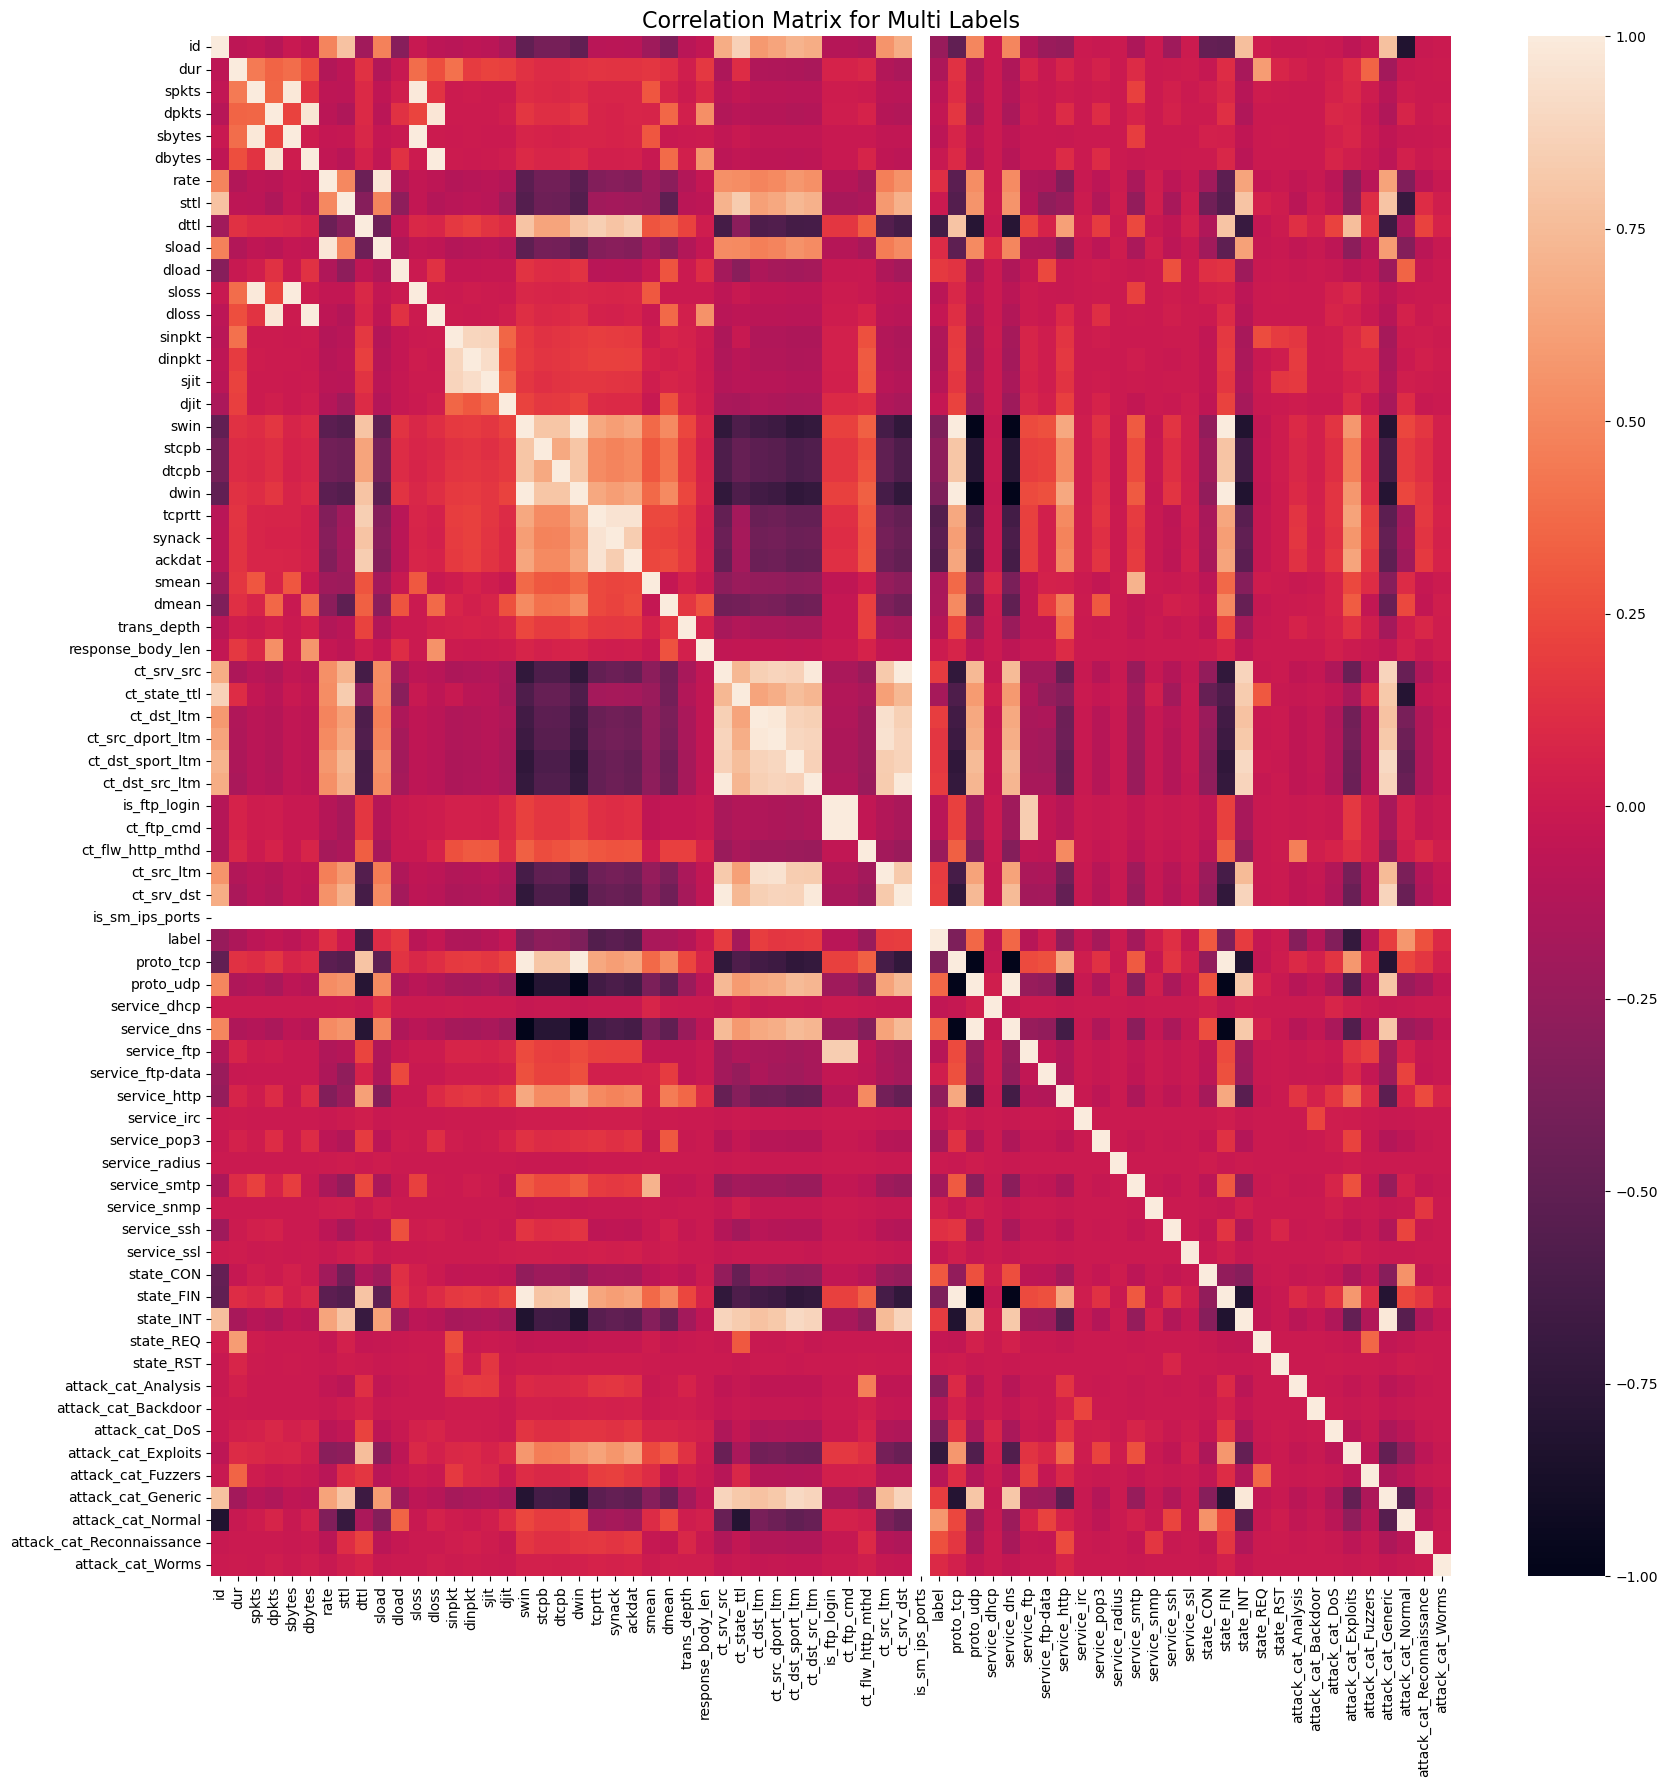

In [40]:
# Matriz de correlação para rótulos multiclasse

plt.figure(figsize=(20,20))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
#plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

In [41]:
#Feature Selection

In [41]:
# encontrando os atributos que têm mais de 0,3 de correlação com o atributo de rótulo de ataque codificado

corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

state_CON              0.302853
attack_cat_Analysis    0.326209
attack_cat_DoS         0.339669
state_FIN              0.361750
swin                   0.364393
dwin                   0.364393
proto_udp              0.364393
proto_tcp              0.364393
service_dns            0.365346
synack                 0.524027
ackdat                 0.570098
tcprtt                 0.570205
attack_cat_Normal      0.570858
dttl                   0.646589
attack_cat_Exploits    0.719733
label                  1.000000
Name: label, dtype: float64

In [42]:
# selecionando atributos encontrados usando o coeficiente de correlação de Pearson

multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'],
      dtype='object')

In [43]:
# Dataset rotulado multi-classe

multi_data = multi_data[multi_cols].copy()



#salvando no disco

multi_data.to_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/multi_data")

In [44]:
X = multi_data.iloc[:,0:44]
y = multi_data.iloc[:,-1]

In [45]:
# selecionando melhores atributos do dataset usando SelectKbest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#aplicando Classe SelectKBest para extrair os 16 melhores recursos

bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)

In [46]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [47]:
#juntando 2 dataframes para melhor visualizacao 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Recurso','Pontuacao'] 

In [56]:
featureScores